In [45]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense,Dropout,Flatten
from keras.optimizers import adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix,f1_score
import itertools
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


In [46]:
mobile_net=keras.applications.MobileNet()  #from imagenet

In [47]:
import os
image_dir='random_images/'
fnames=[os.path.join(image_dir,fname) for fname in os.listdir(image_dir)]

In [48]:
fnames

['random_images/dog.jpg',
 'random_images/tomato.jpeg',
 'random_images/monkey.jpeg',
 'random_images/hot_air_ballon.jpeg',
 'random_images/broccali.jpg',
 'random_images/cucumber.jpg',
 'random_images/Hot-Black-Tea.jpg',
 'random_images/Baby-Elephant.jpg',
 'random_images/cat.jpeg',
 'random_images/hamster.jpg',
 'random_images/koala.jpg',
 'random_images/cat_3.jpeg',
 'random_images/hedgehog.jpeg',
 'random_images/flower.jpg',
 'random_images/dock.jpeg']

(224, 224, 3)
(1, 224, 224, 3)


array([[[[0.62352943, 0.5686275 , 0.4431373 ],
         [0.654902  , 0.6       , 0.47450984],
         [0.654902  , 0.6       , 0.47450984],
         ...,
         [0.8666667 , 0.8352941 , 0.827451  ],
         [0.85882354, 0.827451  , 0.81960785],
         [0.85882354, 0.827451  , 0.81960785]],

        [[0.62352943, 0.5686275 , 0.4431373 ],
         [0.67058825, 0.6156863 , 0.4901961 ],
         [0.67058825, 0.6156863 , 0.4901961 ],
         ...,
         [0.8666667 , 0.8352941 , 0.827451  ],
         [0.85882354, 0.827451  , 0.81960785],
         [0.85882354, 0.827451  , 0.81960785]],

        [[0.6392157 , 0.58431375, 0.45882356],
         [0.67058825, 0.6156863 , 0.4901961 ],
         [0.7019608 , 0.64705884, 0.52156866],
         ...,
         [0.8666667 , 0.8352941 , 0.827451  ],
         [0.8666667 , 0.8352941 , 0.827451  ],
         [0.8666667 , 0.8352941 , 0.827451  ]],

        ...,

        [[0.9764706 , 0.92156863, 0.79607844],
         [0.96862745, 0.9137255 , 0.7882353 ]

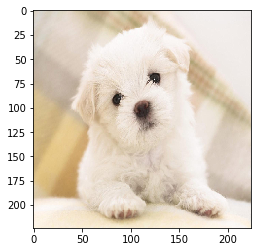

In [49]:
file_path=fnames[0]
# img=cv2.imread(file_path)
# plt.imshow(img)
img=image.load_img(file_path,target_size=(224,224))
img_array=image.img_to_array(img)
print(img_array.shape)
img_array_extend_dim=np.expand_dims(img_array,axis=0)  # 1 for batch
print(img_array_extend_dim.shape)
plt.imshow(img)
keras.applications.mobilenet.preprocess_input(img_array_extend_dim) #seems to return images with certain order RGB ...
# also substracting mean and std based on type of model if from caffe or tensor flow (depending on architecture)

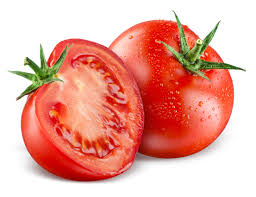

In [28]:
file_path=fnames[0]
    
from IPython.display import Image

Image(filename=file_path,width=300,height=300)


In [52]:

def preprocess_img(file_path):    
    # img=cv2.imread(file_path)
    # plt.imshow(img)
    img=image.load_img(file_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    #print(img_array.shape)
    img_array_extend_dim=np.expand_dims(img_array,axis=0)  # 1 for batch
    #print(img_array_extend_dim.shape)
    plt.imshow(img)
    plt.show()
    return keras.applications.mobilenet.preprocess_input(img_array_extend_dim) #seems to return images with certain order RGB ...
# also substracting mean and std based on type of model if from caffe or tensor flow (depending on architecture)



(1, 1000)


945

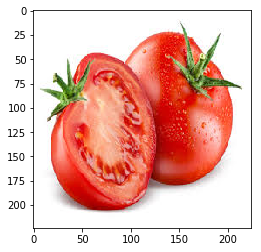

In [35]:
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
print(prediction.shape)
np.argmax(prediction)  #bell pepper!

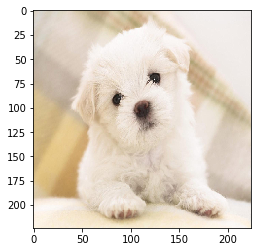

[[('n02086079', 'Pekinese', 0.5197133), ('n02085936', 'Maltese_dog', 0.2487951), ('n02098413', 'Lhasa', 0.16477162), ('n02086240', 'Shih-Tzu', 0.01384853), ('n02104029', 'kuvasz', 0.010600543)]]


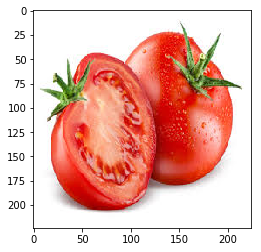

[[('n07720875', 'bell_pepper', 0.3511954), ('n07716906', 'spaghetti_squash', 0.2578227), ('n07745940', 'strawberry', 0.25162432), ('n07717556', 'butternut_squash', 0.022245584), ('n12620546', 'hip', 0.02033543)]]


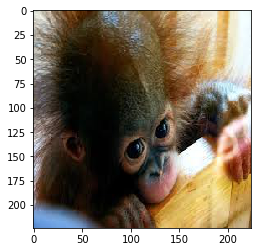

[[('n02493509', 'titi', 0.5099017), ('n02480495', 'orangutan', 0.17282149), ('n02486261', 'patas', 0.09768727), ('n02492660', 'howler_monkey', 0.049570173), ('n02493793', 'spider_monkey', 0.0420486)]]


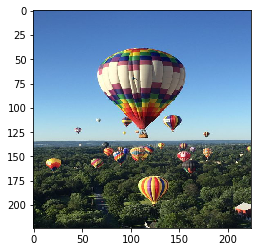

[[('n02782093', 'balloon', 0.9999962), ('n03888257', 'parachute', 3.3984772e-06), ('n04562935', 'water_tower', 1.784629e-07), ('n02692877', 'airship', 1.4246714e-07), ('n04254680', 'soccer_ball', 4.027855e-08)]]


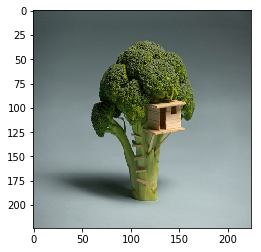

[[('n07714990', 'broccoli', 0.999281), ('n02177972', 'weevil', 0.00011122223), ('n03532672', 'hook', 9.85379e-05), ('n07754684', 'jackfruit', 9.537669e-05), ('n07714571', 'head_cabbage', 4.8617992e-05)]]


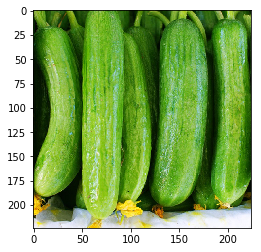

[[('n07718472', 'cucumber', 0.8336702), ('n07716358', 'zucchini', 0.165206), ('n12144580', 'corn', 0.0005447255), ('n07684084', 'French_loaf', 0.00040872127), ('n07871810', 'meat_loaf', 4.356281e-05)]]


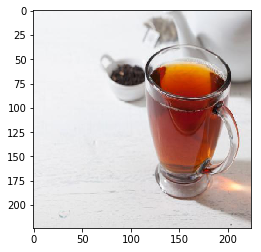

[[('n07930864', 'cup', 0.5771724), ('n07892512', 'red_wine', 0.14892074), ('n07920052', 'espresso', 0.09629444), ('n02823750', 'beer_glass', 0.021558749), ('n04376876', 'syringe', 0.020246161)]]


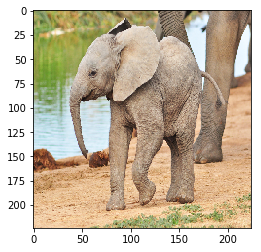

[[('n02504458', 'African_elephant', 0.59308344), ('n02504013', 'Indian_elephant', 0.30938068), ('n01871265', 'tusker', 0.09704488), ('n01704323', 'triceratops', 0.0003470109), ('n02129165', 'lion', 2.776896e-05)]]


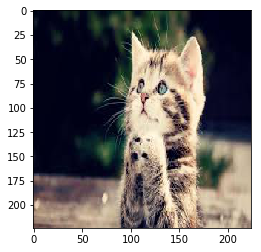

[[('n02124075', 'Egyptian_cat', 0.20268172), ('n02127052', 'lynx', 0.1681573), ('n02123045', 'tabby', 0.1639003), ('n02123159', 'tiger_cat', 0.14531471), ('n02128757', 'snow_leopard', 0.11373155)]]


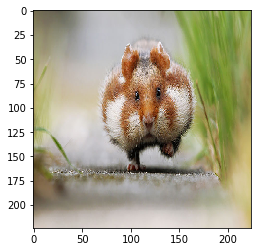

[[('n02342885', 'hamster', 0.5103548), ('n02441942', 'weasel', 0.1833166), ('n02443484', 'black-footed_ferret', 0.17080763), ('n02443114', 'polecat', 0.06189606), ('n02509815', 'lesser_panda', 0.019433934)]]


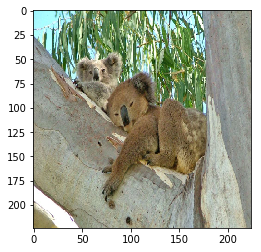

[[('n01882714', 'koala', 0.61031175), ('n02119789', 'kit_fox', 0.13802895), ('n02137549', 'mongoose', 0.10170407), ('n02094258', 'Norwich_terrier', 0.044871904), ('n02120505', 'grey_fox', 0.030513085)]]


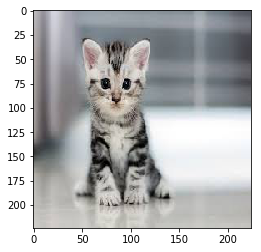

[[('n02124075', 'Egyptian_cat', 0.62941635), ('n02123045', 'tabby', 0.28841826), ('n02123159', 'tiger_cat', 0.029332321), ('n02129604', 'tiger', 0.006806606), ('n02114712', 'red_wolf', 0.004187294)]]


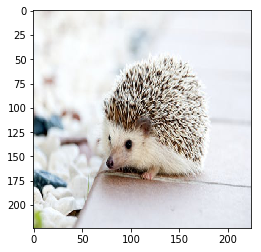

[[('n02346627', 'porcupine', 0.9991228), ('n01872401', 'echidna', 0.00038928146), ('n02138441', 'meerkat', 0.00018886982), ('n02486410', 'baboon', 0.00012608324), ('n02120079', 'Arctic_fox', 4.0579882e-05)]]


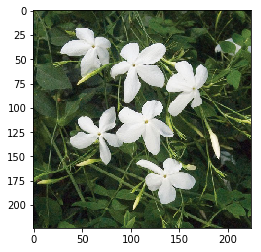

[[('n11939491', 'daisy', 0.75901884), ('n13044778', 'earthstar', 0.08493408), ('n03991062', 'pot', 0.04773375), ('n07734744', 'mushroom', 0.047323544), ('n01944390', 'snail', 0.011254453)]]


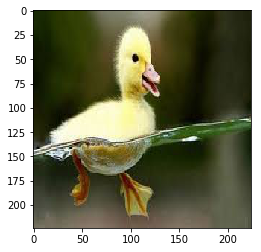

[[('n02088094', 'Afghan_hound', 0.10781472), ('n02490219', 'marmoset', 0.09698094), ('n02493509', 'titi', 0.09187077), ('n01739381', 'vine_snake', 0.07935655), ('n01530575', 'brambling', 0.057604205)]]


In [53]:

for fname in fnames:
    file_path=fname
    img_processed=preprocess_img(file_path)
    prediction=mobile_net.predict(img_processed)
    results=imagenet_utils.decode_predictions(prediction)
    print(results)

In [37]:
results=imagenet_utils.decode_predictions(prediction)
results

40960/35363 [==================================] - 0s 4us/step


[[('n07720875', 'bell_pepper', 0.3511954),
  ('n07716906', 'spaghetti_squash', 0.2578227),
  ('n07745940', 'strawberry', 0.25162432),
  ('n07717556', 'butternut_squash', 0.022245584),
  ('n12620546', 'hip', 0.02033543)]]

[[('n02782093', 'balloon', 0.9999962),
  ('n03888257', 'parachute', 3.3984772e-06),
  ('n04562935', 'water_tower', 1.784629e-07),
  ('n02692877', 'airship', 1.4246714e-07),
  ('n04254680', 'soccer_ball', 4.027855e-08)]]

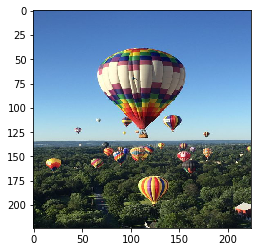

In [40]:
file_path=fnames[1]
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
results=imagenet_utils.decode_predictions(prediction)
results

[[('n07718472', 'cucumber', 0.8336702),
  ('n07716358', 'zucchini', 0.165206),
  ('n12144580', 'corn', 0.0005447255),
  ('n07684084', 'French_loaf', 0.00040872127),
  ('n07871810', 'meat_loaf', 4.356281e-05)]]

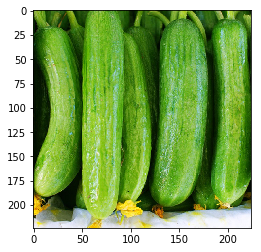

In [41]:
file_path=fnames[2]
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
results=imagenet_utils.decode_predictions(prediction)
results

[[('n07930864', 'cup', 0.5771724),
  ('n07892512', 'red_wine', 0.14892074),
  ('n07920052', 'espresso', 0.09629444),
  ('n02823750', 'beer_glass', 0.021558749),
  ('n04376876', 'syringe', 0.020246161)]]

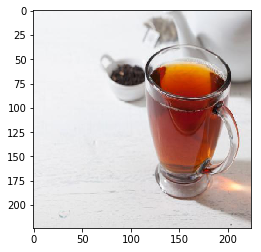

In [42]:
file_path=fnames[3]
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
results=imagenet_utils.decode_predictions(prediction)
results

[[('n02504458', 'African_elephant', 0.59308344),
  ('n02504013', 'Indian_elephant', 0.30938068),
  ('n01871265', 'tusker', 0.09704488),
  ('n01704323', 'triceratops', 0.0003470109),
  ('n02129165', 'lion', 2.776896e-05)]]

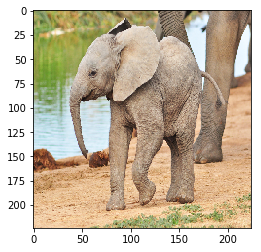

In [43]:
file_path=fnames[4]
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
results=imagenet_utils.decode_predictions(prediction)
results

[[('n02124075', 'Egyptian_cat', 0.62941635),
  ('n02123045', 'tabby', 0.28841826),
  ('n02123159', 'tiger_cat', 0.029332321),
  ('n02129604', 'tiger', 0.006806606),
  ('n02114712', 'red_wolf', 0.004187294)]]

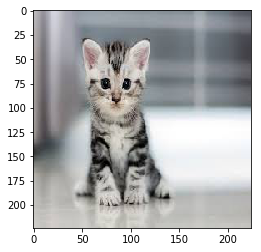

In [44]:
file_path=fnames[5]
img_processed=preprocess_img(file_path)
prediction=mobile_net.predict(img_processed)
results=imagenet_utils.decode_predictions(prediction)
results